In [2]:
import sys
sys.path.insert(0, '/home/work/Simulation/G2Ana/SRKAnalysis')
import srkglobal
import srkplotting as spl
import numpy as np
from scipy.optimize import curve_fit
import os

In [75]:
srkglobal.set_computer("home_laptop")

bid = 68
graphs_dir = '/home/work/Simulation/G2Out/graphs/ID'+str(bid)
if not "ID"+str(bid) in os.listdir('/home/work/Simulation/G2Out/graphs/'):
    os.mkdir(graphs_dir)
srkglobal.set_graphs_dir(graphs_dir)

time_arr = spl.make_timeline(bid)

tree = spl.make_tree_to_array(bid)
#x,y,z,vx,vy,vz,Mx,My,Mz,M,MdotV

In [4]:
def cosinus(t, A, w):
    return A*np.cos(w*t)

def cosinus_off(t, A, w, o):
    return A*np.cos(w*t) + o

def cosinus_full(t, A, w, o, phi):
    return A*np.cos(w*t + phi) + o
theo = 1.6021766208e-19*0.00116592091*1.4513/1.883531594e-28

def sinus(t, A, w):
    return A*np.sin(w*t)

def sinus_off(t, A, w, o):
    return A*np.sin(w*t) + o

def sinus_full(t, A, w, o, phi):
    return A*np.sin(w*t + phi) + o

In [76]:
x = tree[0]
y = tree[1]
z = tree[2]
vx = tree[3]
vy = tree[4]
vz = tree[5]

In [77]:
r = np.sqrt(x**2 + z**2)
r_e = r - 7.112
v_xz = np.sqrt(vx**2 + vz**2)
v_abs = np.sqrt(vx**2 + vy**2 + vz**2)
lab_phi = np.arctan2(z, x)
theta = np.arctan2(-vx, vz)
delta = lab_phi - theta
v_tan = v_xz * np.cos(delta)
v_rad = v_xz * np.sin(delta)

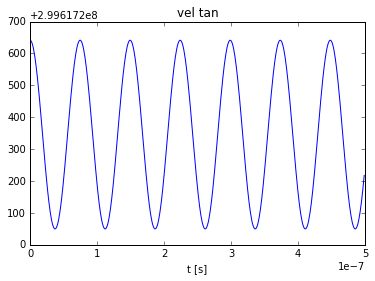

In [33]:
spl.plot_single('vel tan', v_tan[:500], time_arr[:500], 'show')

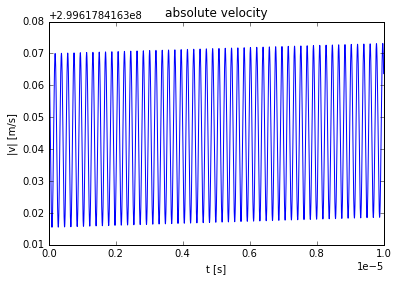

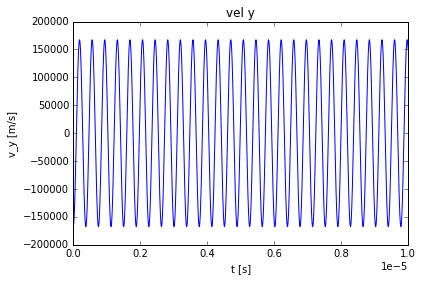

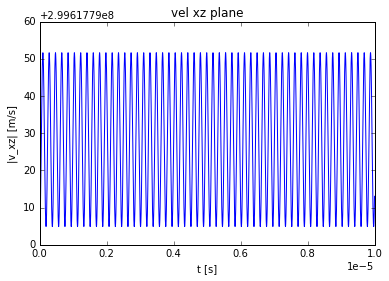

In [52]:
#absolute velocity
spl.plot_single('absolute velocity', v_abs, time_arr, 'both', '|v| [m/s]')
spl.plot_single('vel y', vy, time_arr, 'both', 'v_y [m/s]')
spl.plot_single('vel xz plane', v_xz, time_arr, 'both', '|v_xz| [m/s]')

In [39]:
print "Delta v_xz: "+str(v_xz[-1]-v_xz[0])
print "rel error: "+str((v_xz[-1]-v_xz[0])/v_xz[0])

Delta v_xz: 0.00320935249329
rel error: 1.07115116149e-11


In [73]:
phi0 = np.arctan2(vy[0],v_xz[0])
C_P = phi0**2/4
#C_P = phi0**2/2
print "Phi0: "+str(phi0)
print "C_Phi: "+str(C_P)
print "C_Phi in ppb: "+str(C_P*1e9)

Phi0: 0.0021615504497
C_Phi: 1.16807508665e-06
C_Phi in ppb: 1168.07508665


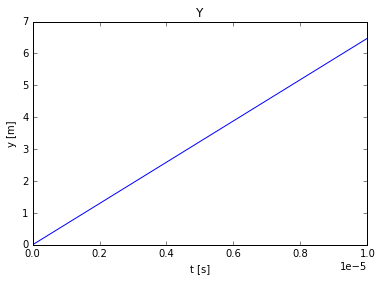

In [69]:
spl.plot_single('Y', y, time_arr, 'both', 'y [m]')

In [13]:
print 'max abs v: '+str(v_abs[:200].max())
print 'min abs y: '+str(vy[:200].min())
print 'min abs tan: '+str(v_tan[:200].min())
np.sqrt(v_tan[:200].min()**2 + vy[:200].min()**2)

max abs v: 299617841.702
min abs y: -167464.022109
min abs tan: 299617794.9


299617841.70008457

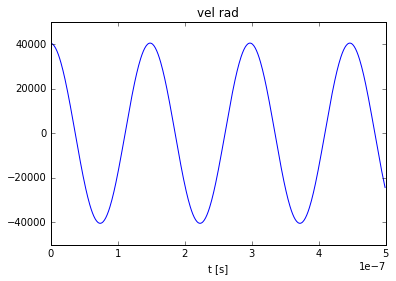

Amplitude: 40367.4049273 +- 0.0271800578725
Frequency: 42128745.625 +- 0.233594035551
Offset: 0.00569119953127 +- 0.0190618900332
Phase: 0.0445026459823 +- 1.34752672037e-06


In [97]:
#radial velocity
spl.plot_single('vel rad', v_rad[:500], time_arr[:500], 'show')
pars, covs = curve_fit(cosinus_full, time_arr, v_rad, [(v_rad.max()-v_rad.min())/2, 4.2e7, 0, 0])
print "Amplitude: "+str(pars[0])+" +- "+str(np.sqrt(covs[0,0]))
print "Frequency: "+str(pars[1])+" +- "+str(np.sqrt(covs[1,1]))
#v_rad[:100].max()
print "Offset: "+str(pars[2])+" +- "+str(np.sqrt(covs[2,2]))
print "Phase: "+str(pars[3])+" +- "+str(np.sqrt(covs[3,3]))
#spl.plot_comparative('vel rad', [v_rad[:500], sinus(time_arr[:500], (v_rad.max()-v_rad.min())/2, 4.2e7, 0, 0)], time_arr[:500], 'show')

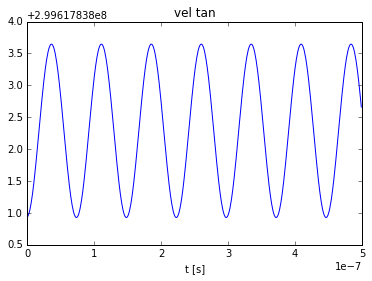

Amplitude: -1.36145339658 +- 0.000297757386093
Frequency: 84269686.4709 +- 79.3353143742
Phase: 0.00788949772083 +- 0.000252344791811
Offset: 299617840.287 +- 0.000390513289804


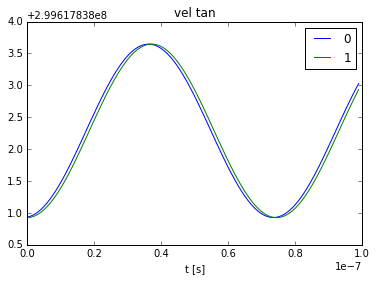

In [84]:
#tangential velocity
spl.plot_single('vel tan', v_tan[:500], time_arr[:500], 'show')
#pars, covs = curve_fit(cosinus_off, time_arr, v_tan, [(v_tan.max()-v_tan.min())/2, 8.426e7, v_tan.mean()])
pars, covs = curve_fit(cosinus_full, time_arr, v_tan, [-(v_tan.max()-v_tan.min())/2, 8.4257491e7, 0, v_tan.mean()])
print "Amplitude: "+str(pars[0])+" +- "+str(np.sqrt(covs[0,0]))
print "Frequency: "+str(pars[1])+" +- "+str(np.sqrt(covs[1,1]))
print "Offset: "+str(pars[2])+" +- "+str(np.sqrt(covs[2,2]))
print "Phase: "+str(pars[3])+" +- "+str(np.sqrt(covs[3,3]))
#v_tan[:100].min()
#spl.plot_comparative('vel tan', [v_tan[:500], cosinus_off(time_arr[:500], -(v_tan.max()-v_tan.min())/2, 8.426e7, v_tan.mean())], time_arr[:500], 'show')
spl.plot_comparative('vel tan', [v_tan[:100], cosinus_full(time_arr[:100], pars[0], 84257490, pars[2], pars[3])], time_arr[:100], 'show')

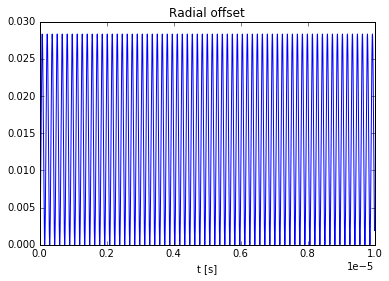

Amplitude: -0.0141646558281 +- 7.04149330397e-08
Frequency: 42044752.8582 +- 1.7187277759
Offset: 0.0141717535805 +- 4.97697611908e-08
Phase: -10.9955688437 +- 9.93340012649e-06


In [34]:
#radial offset from magic radius
spl.plot_single('Radial offset', r_e, time_arr, 'show')
#pars, covs = curve_fit(cosinus_off, time_arr, r_e, [-.001, 4.21287e7, 0])
pars, covs = curve_fit(sinus_full, time_arr, r_e, [.001, 4.21287e7, 0, 0])
print "Amplitude: "+str(pars[0])+" +- "+str(np.sqrt(covs[0,0]))
print "Frequency: "+str(pars[1])+" +- "+str(np.sqrt(covs[1,1]))
print "Offset: "+str(pars[2])+" +- "+str(np.sqrt(covs[2,2]))
print "Phase: "+str(pars[3])+" +- "+str(np.sqrt(covs[3,3]))

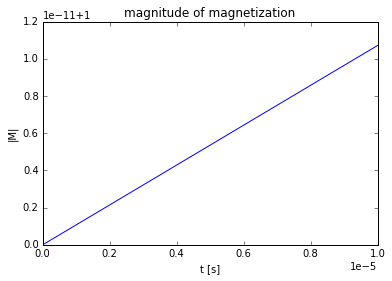

Delta magM = rel error: 1.07156505891e-11


In [55]:
magM = tree[9]
spl.plot_single('magnitude of magnetization', magM, time_arr, 'both', '|M|')
print "Delta magM = rel error: "+str(magM[-1]-magM[0])

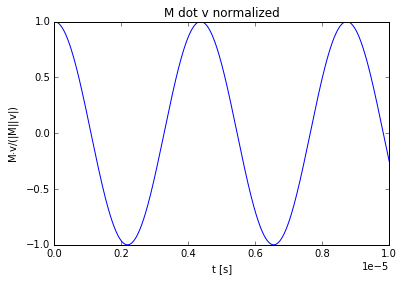

Amplitude: 0.999997817855 +- inf
Frequency: 1439337.8755 +- inf
Offset: -1.54008475953e-07 +- inf
Phase: -5.50824651564e-11 +- inf
Delta w_a: -3.35859207739
Correction in ppb: -2333.42309512


In [78]:
MdotV = tree[10]
spl.plot_single('M dot v normalized', MdotV, time_arr, 'both', 'M'+r'$\cdot$'+'v/(|M||v|)')
#pars, covs = curve_fit(cosinus, time_arr, MdotV, [1, theo])
pars, covs = curve_fit(cosinus_full, time_arr, MdotV, [1, theo, 0,0])
print "Amplitude: "+str(pars[0])+" +- "+str(np.sqrt(covs[0,0]))
print "Frequency: "+str(pars[1])+" +- "+str(np.sqrt(covs[1,1]))
print "Offset: "+str(pars[2])+" +- "+str(np.sqrt(covs[2,2]))
print "Phase: "+str(pars[3])+" +- "+str(np.sqrt(covs[3,3]))
print "Delta w_a: "+str(pars[1]-theo)
print "Correction in ppb: "+str((pars[1]-theo)*1e9/theo)
#spl.plot_comparative('Projection', [MdotV[90000:90500], cosinus(time_arr[90000:90500], 1, pars[1]), cosinus(time_arr[90000:90500], 1, theo)], time_arr[90000:90500], 'show')

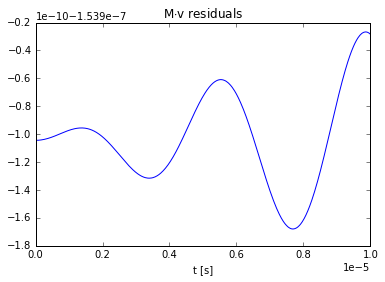

In [79]:
res = MdotV - cosinus(time_arr, pars[0], pars[1])
spl.plot_single('M'+r'$\cdot$'+'v residuals', res, time_arr, 'both')

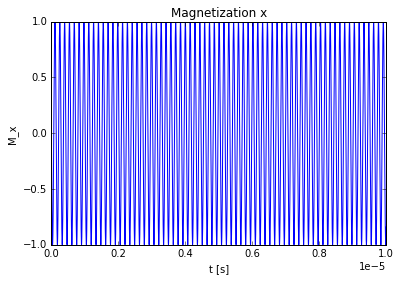

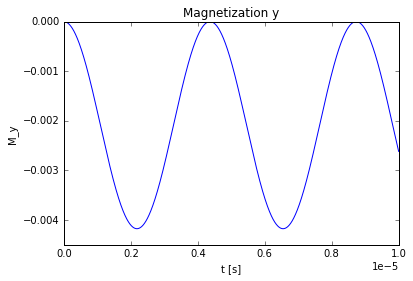

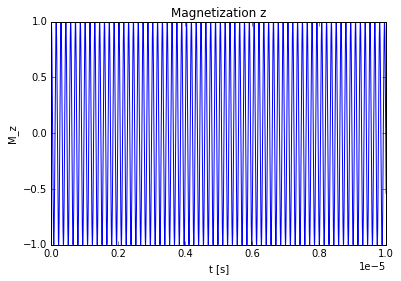

In [80]:
Mx = tree[6]
My = tree[7]
Mz = tree[8]
spl.plot_single('Magnetization x', Mx, time_arr, 'both', 'M_x')
spl.plot_single('Magnetization y', My, time_arr, 'both', 'M_y')
spl.plot_single('Magnetization z', Mz, time_arr, 'both', 'M_z')

In [169]:
def magnitude(x, y, z):
    return np.sqrt(x**2 + y**2 + z**2)

def calc_proj(vx, vy, vz, Mx, My, Mz):
    return (vx*Mx + vy*My + vz*Mz)/(magnitude(vx, vy, vz) * magnitude(Mx, My, Mz))

MV1 = calc_proj(vx1, vy1, vz1, Mx2, My2, Mz2)
MV2 = calc_proj(vx2, vy2, vz2, Mx1, My1, Mz1)

pars_calc1, covs_calc1 = curve_fit(cosinus, time1, MV1, [1, theo, 0])
print pars_calc1[1] - theo
pars_calc2, covs_calc2 = curve_fit(cosinus, time2, MV2, [1, theo, 0])
print pars_calc2[1] - theo

-3.42590038688
21.3588375247


In [69]:
Av = (vxz.max()-vxz.min())/2

In [73]:
k=2*4.8e6
beta=vxz.mean()/299792458.
B = 1.4513
R0 = 7.112
n = k*R0/(vxz.mean()*B)
#n=0.122
chargeToMassRatio = 1.6021766208e-19 / 1.883531594e-28
gamma = 1/np.sqrt(1 - beta**2)
r = gamma*vxz.mean()/(chargeToMassRatio*1.4513)
xe2 = gamma**2*(vxz.mean()**2 + Av**2/2)/(chargeToMassRatio**2*B**2) - 2*R0*gamma*vxz.mean()/(chargeToMassRatio*B) + R0**2
#C_E = -2*k*(vxz.mean()*B - k*R0)*xe2/(R0*B**2*299792458.**2)
#C_E = -2*n*(1-n)*beta**2 *xe2/(R0**2)
C_E = -2*n*(1-n)*beta**2 *(r-7.112)**2/(R0**2)
#-2*0.157*(1-0.157)*0.9994**2*1e-4/R0**2
C_E
n

0.15701382672732603

In [8]:
np.sqrt(7.8101894582793548e-08*4)*180/np.pi

0.032024577779220915

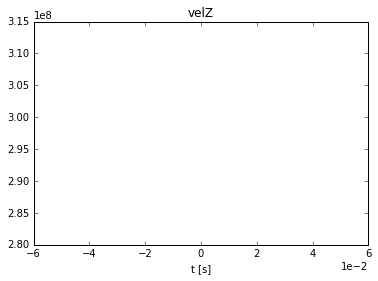

In [28]:
spl.plot_single('velZ', vz, time_arr, 'show')

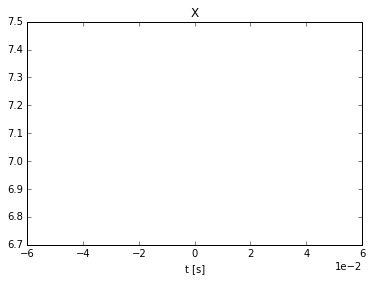

In [29]:
spl.plot_single('X', x, time_arr, 'show')

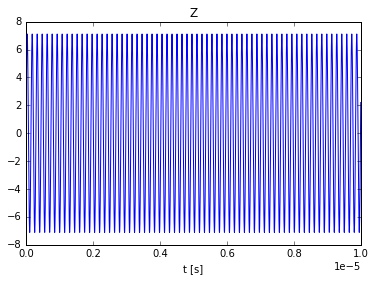

In [137]:
spl.plot_single('Z', z, time_arr, 'show')

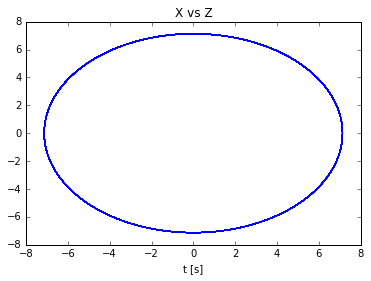

In [54]:
spl.plot_single('X vs Z', x, z, 'show')

In [10]:
beta_y = 1.5592e7
ypars, ycovs = curve_fit(cosinus, time_arr, y, [0.01, beta_y])
print ypars, ycovs

[ -9.39041573e-04   1.56843282e+07] [[  9.93772479e-09   9.05718421e-03]
 [  9.05718421e-03   3.36221152e+08]]


In [18]:
index = np.argmax(r>=0)
r[index]
v_abs = vxz[index]
phi = np.arctan2(z[index],x[index])
print phi
theta = np.arctan2(-vx[index], vz[index])
print theta
delta = phi - theta
tan = v_abs * np.cos(delta)
rad = v_abs * np.sin(delta)
print tan, rad
print v_abs, np.sqrt(tan**2 + rad**2)

1.7695544793
1.7694320967
299617839.403 36668.0099668
299617841.646 299617841.646


In [42]:
beta_r = 3.9134e7
rpars, rcovs = curve_fit(cosinus, time_arr, r, [0.01, beta_r])
print rpars, rcovs

[  2.06965775e-04   3.91294312e+07] [[  8.64727298e-11   1.49119721e-04]
 [  1.49119721e-04   6.04497443e+07]]


In [48]:
def lin(xdata, slope, intercept):
    return slope*xdata + intercept

def lin_zero(xdata, slope):
    return slope*xdata

In [ ]:
def sinus(t, A, w):
    return A*np.sin(w*t)
def sinus_dec(t, A, w):
    return (A/t)*np.sin(w*t)
#sinpars, sincovs = curve_fit(sinus, time_arr, abs_phi[0][0], [7.0773e-6, 1.1466e09])
#print sinpars, sincovs